In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
noun_sentence_df_final_joined_df_selected_columns_use_min = pd.\
    read_feather('noun_sentence_df_final_joined_df_selected_columns_use_min_all.fea')

In [4]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use_min

In [5]:
len(noun_sentence_df_final_joined_df_selected_columns_use)

464818

In [6]:
noun_sentence_df_final_joined_df_selected_columns_use = noun_sentence_df_final_joined_df_selected_columns_use.dropna()

In [7]:
noun_sentence_df_final_joined_df_selected_columns_use

,level_0,listingid,index_x,AVM_Error_List_x,Listing_Error_List_x,Transdate_x,Transprice_x,total_value_x,cj_living_area_x,effective_year_built_x,...,sentence_composition_0,sentence_composition_1,sentence_composition_2,sentence_composition_3,sentence_composition_4,sentence_composition_5,sentence_composition_6,sentence_composition_7,sentence_composition_8,transaction_year
0,0,1066,central heat,0.095595,-0.066000,20180111,150000.0,98615.0,925.0,2005.0,...,58.620690,17.241379,13.793103,6.896552,1.724138,1.724138,0.0,58.0,15.0,2018.0
1,1,1071,new appliances,-0.038420,-0.018605,20171208,215000.0,143200.0,1730.0,1995.0,...,57.812500,17.187500,18.750000,1.562500,3.125000,0.000000,0.0,64.0,13.0,2017.0
2,2,1079,new kitchen cabinets,-0.067666,-0.075000,20180116,240000.0,184190.0,2640.0,2000.0,...,57.894737,15.789474,24.561404,1.754386,0.000000,0.000000,0.0,57.0,16.0,2018.0
3,3,1080,modern updates,0.085874,0.000000,20171227,389900.0,324300.0,3092.0,1997.0,...,52.941176,10.294118,30.882353,4.411765,0.000000,0.000000,0.0,68.0,18.0,2017.0
4,4,1084,pool pump,-0.152460,0.000000,20180201,214900.0,201300.0,2600.0,1997.0,...,58.666667,10.666667,29.333333,4.000000,0.000000,0.000000,0.0,75.0,21.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464812,464812,251228152,swimming tennis community,-0.080778,0.061765,20210629,340000.0,320800.0,2727.0,2001.0,...,55.000000,13.333333,23.333333,5.000000,0.000000,0.000000,0.0,60.0,16.0,2021.0
464813,464813,251228259,sugar hill,0.040465,0.058333,20210625,360000.0,276500.0,2722.0,2013.0,...,52.112676,11.267606,32.394366,2.816901,1.408451,0.000000,0.0,71.0,16.0,2021.0
464814,464814,251233929,great investment opportunity,-0.352831,0.064013,20210630,305440.0,242500.0,1930.0,1956.0,...,62.195122,13.414634,23.170732,1.219512,0.000000,0.000000,0.0,82.0,24.0,2021.0
464815,464815,251262429,great rental property,-0.359648,0.132275,20210630,94500.0,52978.0,1236.0,2000.0,...,68.852459,6.557377,22.950820,1.639344,0.000000,0.000000,0.0,61.0,18.0,2021.0


In [8]:
noun_sentence_df_final_joined_df_selected_columns_use.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [9]:
predictor_columns = ['cj_living_area_x', 'story_x', 'avmValue_x','bedrooms_x']

In [10]:
columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                         pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                        startswith('AVM_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                                                        startswith('Listing_Error_Indicators')]
predictor_columns = predictor_columns + list(columns_selected)

columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                                                        startswith('sentence_composition')]
predictor_columns = predictor_columns + list(columns_selected)


columns_selected = noun_sentence_df_final_joined_df_selected_columns_use.columns[\
                                pd.Series(noun_sentence_df_final_joined_df_selected_columns_use.columns).str.\
                                                        startswith('clean_publicremarks_additional_words_vaderpolarity')]
predictor_columns = predictor_columns + list(columns_selected)


In [11]:
predictor_columns


['cj_living_area_x',
 'story_x',
 'avmValue_x',
 'bedrooms_x',
 'AVM_Error_Indicators_0_x',
 'AVM_Error_Indicators_1_x',
 'AVM_Error_Indicators_2_x',
 'AVM_Error_Indicators_3_x',
 'AVM_Error_Indicators_4_x',
 'AVM_Error_Indicators_5_x',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_7_x',
 'AVM_Error_Indicators_8_x',
 'AVM_Error_Indicators_9_x',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_11_x',
 'AVM_Error_Indicators_scale_x',
 'AVM_Error_Indicators_0_y',
 'AVM_Error_Indicators_1_y',
 'AVM_Error_Indicators_2_y',
 'AVM_Error_Indicators_3_y',
 'AVM_Error_Indicators_4_y',
 'AVM_Error_Indicators_5_y',
 'AVM_Error_Indicators_6_y',
 'AVM_Error_Indicators_7_y',
 'AVM_Error_Indicators_8_y',
 'AVM_Error_Indicators_9_y',
 'AVM_Error_Indicators_10_y',
 'AVM_Error_Indicators_11_y',
 'AVM_Error_Indicators_scale_y',
 'AVM_Error_Indicators_0',
 'AVM_Error_Indicators_1',
 'AVM_Error_Indicators_2',
 'AVM_Error_Indicators_3',
 'AVM_Error_Indicators_4',
 'AVM_Error_Indicators_5',
 'AVM_Err

In [47]:
predictor_columns = [   'sentence_composition_7_y',
 'AVM_Error_Indicators_5_y',
 'sentence_composition_7',
 'AVM_Error_Indicators_4_y',
 'AVM_Error_Indicators_5_x',
 'AVM_Error_Indicators_0',
 'AVM_Error_Indicators_10_x',
 'AVM_Error_Indicators_11_y',
 'AVM_Error_Indicators_4_x',
 'cj_living_area_x',
 'AVM_Error_Indicators_6_x',
 'AVM_Error_Indicators_0_x',
 'avmValue_x']

In [68]:
noun_sentence_df_final_joined_df_selected_columns_use.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [69]:
Predictors = noun_sentence_df_final_joined_df_selected_columns_use[predictor_columns].to_numpy()

In [71]:
Predictors.shape

(400756, 13)

In [51]:
predictand = noun_sentence_df_final_joined_df_selected_columns_use.avmerror_x.values

In [52]:
predictand.shape

(400756,)

In [53]:
train_samples = 200000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    predictand,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [54]:
np.max(X_train)

5199509.02

In [55]:
model = RandomForestRegressor(n_estimators = 100,  min_samples_leaf=30, 
                              max_features = 6, max_depth=40
                              )

#model = RandomForestRegressor()
                              


In [56]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=6, min_samples_leaf=30)

In [57]:
print(model.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 40, 'max_features': 6, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 30, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [58]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [59]:
y_train.min()

-1.492387621359223

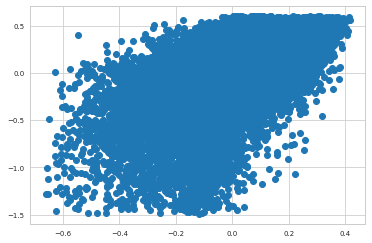

In [60]:
plt.plot(predictions_train,y_train,'o')

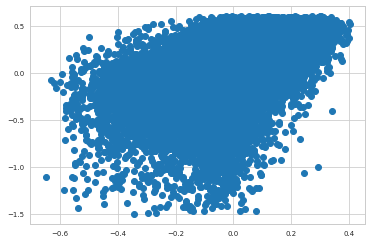

In [61]:
plt.plot(predictions_test,y_test,'o')

In [62]:
df = noun_sentence_df_final_joined_df_selected_columns_use.copy()


In [63]:
predictions_test_value = df['avmValue_x'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue_x'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [44]:
df.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

In [45]:
print(np.mean(np.abs(df['Transprice_x'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice_x'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice_x'].values[:train_samples]- df['avmValue_x'].values[:train_samples])/\
              (df['Transprice_x'].values[:train_samples])))


0.10485947767604864
0.12211574741864119


In [46]:
print(np.mean(np.abs(df['Transprice_x'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice_x'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice_x'].values[train_samples:]- df['avmValue_x'].values[train_samples:])/\
              (df['Transprice_x'].values[train_samples:])))


0.1076843011681092
0.11670730944205586


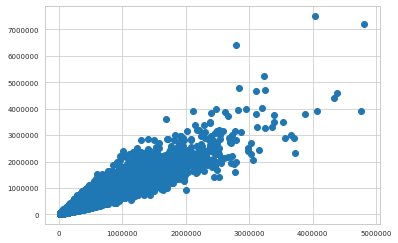

In [32]:
plt.plot(predictions_train_value,df['Transprice_x'].values[:train_samples],'o')

In [33]:
df.columns

Index(['level_0', 'listingid', 'index_x', 'AVM_Error_List_x',
       'Listing_Error_List_x', 'Transdate_x', 'Transprice_x', 'total_value_x',
       'cj_living_area_x', 'effective_year_built_x',
       ...
       'sentence_composition_0', 'sentence_composition_1',
       'sentence_composition_2', 'sentence_composition_3',
       'sentence_composition_4', 'sentence_composition_5',
       'sentence_composition_6', 'sentence_composition_7',
       'sentence_composition_8', 'transaction_year'],
      dtype='object', length=158)

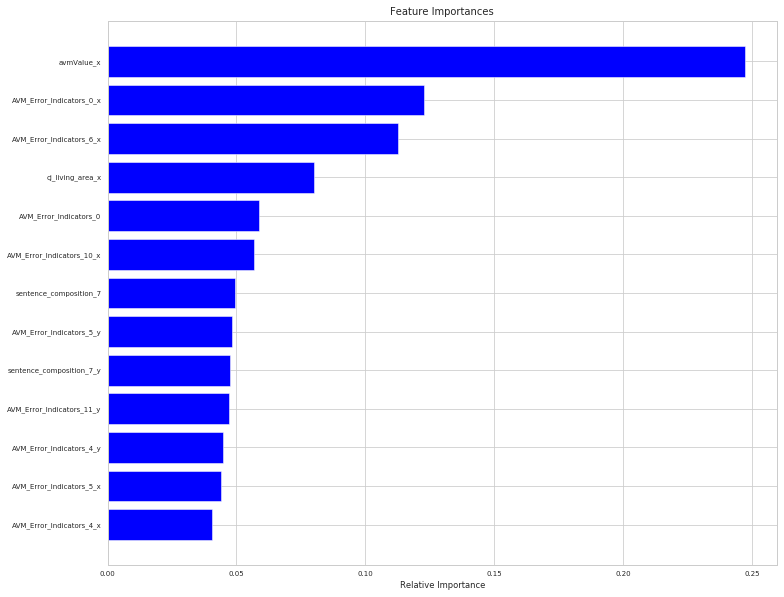

In [65]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
[features[i] for i in indices]

In [64]:
import joblib
filename = 'RF_newmodel_01_3mins.sav'
joblib.dump(model,filename)

['RF_newmodel_01_3mins.sav']